# Introduction

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ hai trên toàn cầu. Đây là một bệnh có tỷ lệ mắc bệnh, tàn tật và tử vong cao, trong đó các nạn nhân có thể đột ngột trải qua tình trạng liệt, suy giảm khả năng nói hoặc mất thị lực do sự gián đoạn dòng máu (thiếu máu cục bộ) gây ra bởi huyết khối và thuyên tắc.

Mặc dù cơ chế bệnh sinh của đột quỵ chưa được làm sáng tỏ hoàn toàn, nhưng nó được biết là có mối liên hệ chặt chẽ với các chỉ số trao đổi chất bất thường, trong đó 90% có thể được kiểm soát. Đây là lý do tại sao việc dự đoán đột quỵ có thể mang tính quyết định, giúp các cá nhân được điều trị sớm hơn và tránh các hậu quả tàn tật hoặc tử vong.

# Objective

Mục đích của nghiên cứu này là áp dụng các kỹ thuật Khoa học Dữ liệu và Máy học để xây dựng một mô hình chính xác dựa trên bộ dữ liệu về đột quỵ nhằm dự đoán kết quả đột quỵ từ việc biết các đặc điểm cá nhân của một người. Đồng thời, nghiên cứu cung cấp thông tin hữu ích về khả năng một người có nguy cơ bị đột quỵ, hỗ trợ nhân viên y tế đưa ra các hành động cần thiết nhằm giảm thiểu rủi ro hiện có và tránh những hậu quả nghiêm trọng.

# 2. Data Understanding

Nguồn Data:
https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Reading Data (EDA)

In [8]:
ds= pd.read_csv("DotQuy.csv")
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


## Feature Description

Chúng ta có thể thấy rằng bộ dữ liệu chứa thông tin về 43400 bệnh nhân, bao gồm các đặc trưng sau:

id: Mã định danh của từng bệnh nhân.

gender: Giới tính của bệnh nhân.

age: Tuổi của bệnh nhân.

hypertension: Cho biết liệu bệnh nhân có bị cao huyết áp hay không.

heart_disease: Cho biết liệu bệnh nhân có mắc bệnh tim mạch hay không.

ever_married: Cho biết liệu bệnh nhân đã từng kết hôn hay chưa.

work_type: Loại công việc của bệnh nhân.

residence_type: Loại nơi cư trú của bệnh nhân (thành thị hoặc nông thôn).

avg_glucose_level: Mức đường huyết trung bình của bệnh nhân.

bmi: Chỉ số khối cơ thể (Body Mass Index) của bệnh nhân.

smoking_status: Tình trạng hút thuốc của bệnh nhân.

stroke: Kết quả đột quỵ của bệnh nhân trong bộ dữ liệu (có hay không bị đột quỵ).

In [9]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'hypertension', 'heart_disease']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

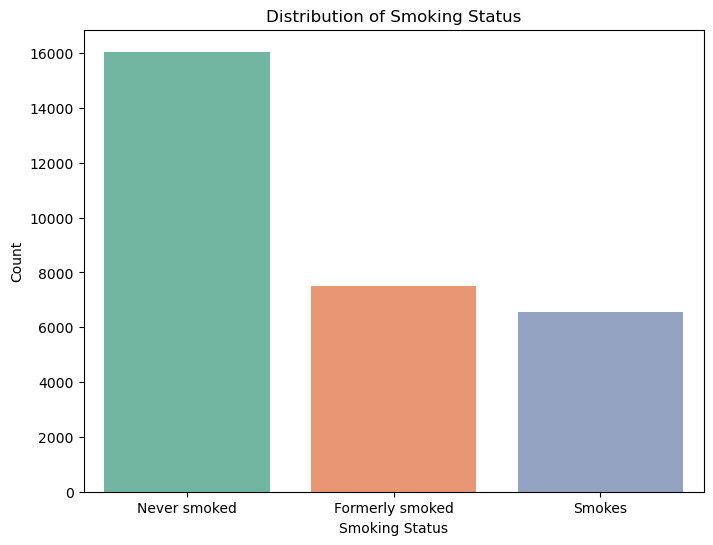

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ds, x='smoking_status', palette='Set2')

plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')

plt.xticks(ticks=[0, 1, 2], labels=['Never smoked', 'Formerly smoked', 'Smokes'])

plt.show()

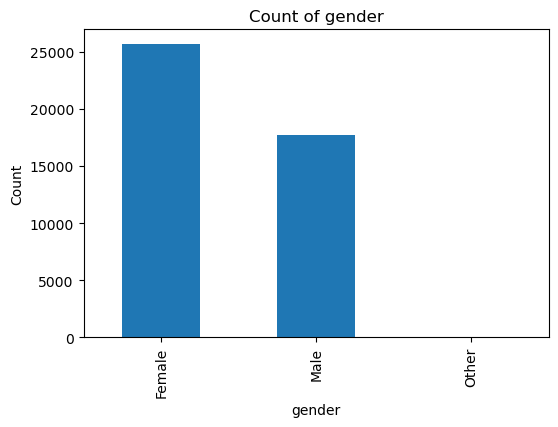

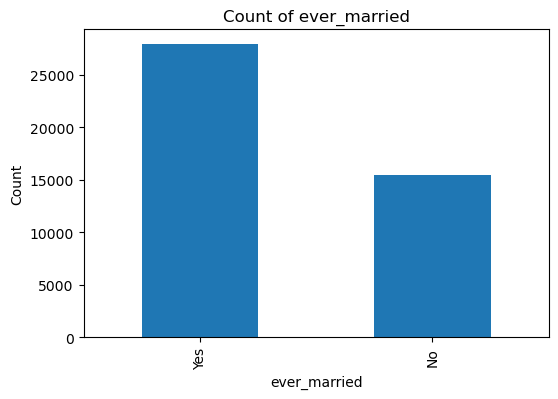

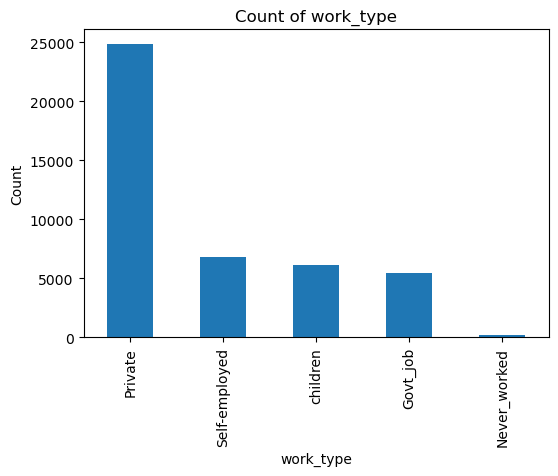

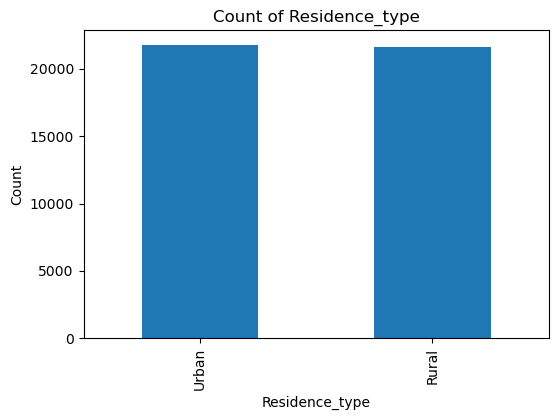

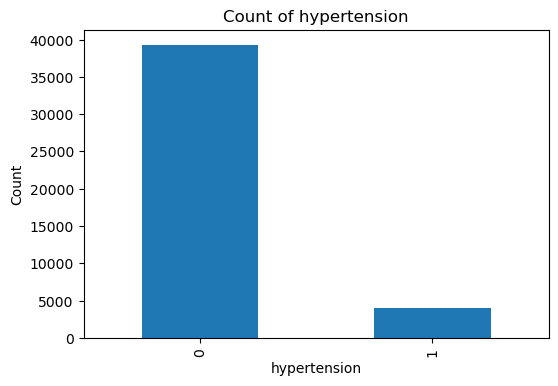

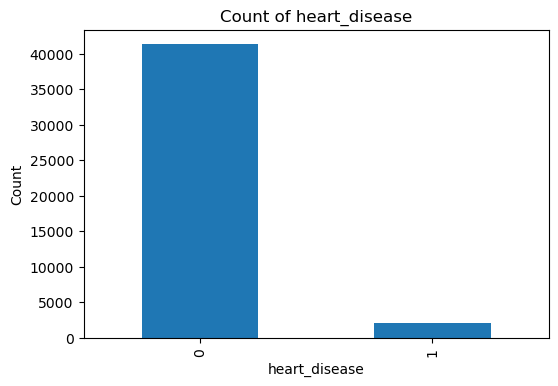

In [11]:
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    ds[col].value_counts().plot(kind='bar', title=f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


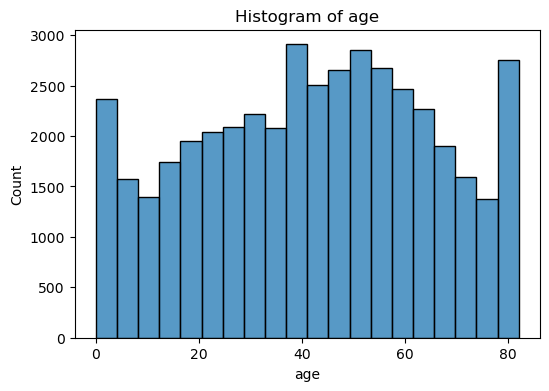

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


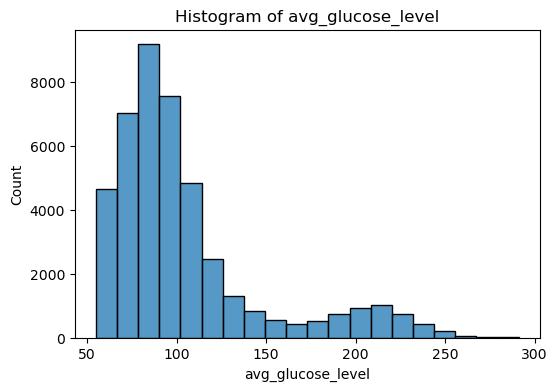

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


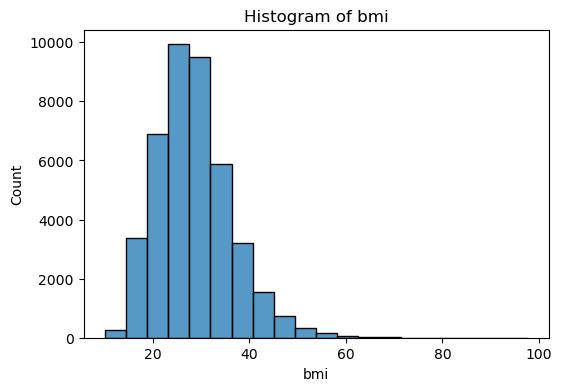

In [12]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(ds[col], bins=20, kde=False)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Missing Data and Dropping 'id'

Đầu tiên, chúng ta có thể loại bỏ thông tin không cần thiết như 'id', vì đây chỉ là mã định danh của bệnh nhân và không cung cấp thông tin hữu ích nào trong trường hợp này. Nếu sử dụng sẽ dẫn tới OVF

In [13]:
ds.drop(['id'],axis=1, inplace=True)
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


Giờ ta sẽ check xem Data có bị miss dữ liệu nào không

In [16]:
ds.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

Do dữ liệu ở cột BMI bị thiếu ít so với tất cả Data nên xóa đi

In [17]:
#Xóa đi các sample bị thiếu giá trị bmi
ds=ds.dropna(subset=['bmi'])

Check lại

In [18]:
ds.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       12866
stroke                   0
dtype: int64

In [19]:
ds.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [20]:
ds.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,41938.00000,41938.000000,41938.000000,41938.000000,41938.000000,41938.000000
mean,41.83929,0.087510,0.043111,103.632645,28.605038,0.015332
std,22.48366,0.282585,0.203110,42.229814,7.770020,0.122872
min,0.08000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.00000,0.000000,0.000000,77.370000,23.200000,0.000000
50%,43.00000,0.000000,0.000000,91.320000,27.700000,0.000000
75%,59.00000,0.000000,0.000000,111.480000,32.900000,0.000000
max,82.00000,1.000000,1.000000,291.050000,97.600000,1.000000


Từ mô tả, chúng ta có thể xác định được phạm vi giá trị của các đặc trưng số, bao gồm: tuổi, chỉ số đường huyết trung bình và chỉ số khối cơ thể (BMI):

Tuổi: từ 0.08 đến 82 tuổi
Chỉ số đường huyết trung bình: từ 55 đến 291.05
BMI: từ 10.31 đến 97.6

## Unknown smoking status

Trong cột này giá trị bị thiếu rất nhiều nếu cứ để vậy thì có thể dẫn tới nhiễu dữ liệu

In [21]:
missing_smoking_status = ds[ds['smoking_status'].isnull()]

count_flag = missing_smoking_status['stroke'].value_counts()

print("Số lượng giá trị 0 và 1 khi 'smoking_status' bị thiếu:")
print(count_flag)

Số lượng giá trị 0 và 1 khi 'smoking_status' bị thiếu:
stroke
0    12771
1       95
Name: count, dtype: int64


In [22]:
ds=ds.dropna(subset=['smoking_status'])

In [23]:
ds.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Gender classification

In [24]:
#Giá trị other trong Gender
ds.gender.value_counts(normalize=False)

gender
Female    17852
Male      11213
Other         7
Name: count, dtype: int64

Chỉ có tỷ lệ nhỏ là giới tính khác nên ta có thể bỏ đi

In [25]:
ds = ds[ds['gender'] != 'Other']
ds.gender.value_counts(normalize=False)

gender
Female    17852
Male      11213
Name: count, dtype: int64

## Work type assumption

In [26]:
#Giá trị trong Work type
ds.work_type.value_counts(normalize=False)

work_type
Private          18950
Self-employed     5204
Govt_job          4195
children           615
Never_worked       101
Name: count, dtype: int64

Do công việc children cũng là never_worked nên có thể chuyển thành Never_Worked

<Axes: title={'center': 'Count (target)'}, xlabel='work_type'>

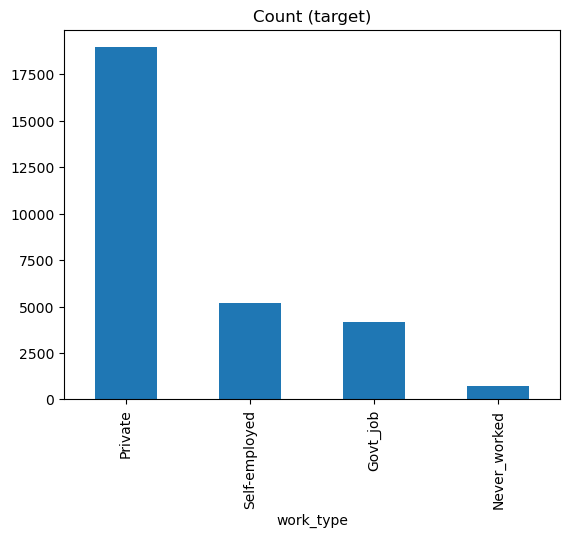

In [27]:
ds.loc[ds['work_type'] == 'children','work_type'] = 'Never_worked'
ds.work_type.value_counts().plot(kind='bar', title='Count (target)')

## MinMaxScaler


In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])
print(ds[columns_to_scale].head())

        age  avg_glucose_level       bmi
1  0.666667           0.139595  0.355311
3  0.833333           0.059439  0.315018
6  0.583333           0.095662  0.092796
7  0.902778           0.798678  0.206349
8  0.305556           0.096001  0.271062


## Standard Scaler & Onehot

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['age', 'avg_glucose_level', 'bmi']
ds[columns_to_scale] = scaler.fit_transform(ds[columns_to_scale])
print(ds[columns_to_scale].head())


        age  avg_glucose_level       bmi
1  0.551115          -0.407443  1.271273
3  1.191709          -0.825365  0.812546
6  0.230818          -0.636505 -1.717401
7  1.458623           3.028922 -0.424626
8 -0.836838          -0.634738  0.312117


## Onehot

In [29]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

ds['gender'] = label_encoder.fit_transform(ds['gender'])
ds['ever_married'] = label_encoder.fit_transform(ds['ever_married'])
ds['Residence_type'] = label_encoder.fit_transform(ds['Residence_type'])
ds = pd.get_dummies(ds, columns=['work_type'], drop_first=True)
ds = pd.get_dummies(ds, columns=['smoking_status'], drop_first=True)
print(ds[['gender', 'ever_married', 'Residence_type']].head())

   gender  ever_married  Residence_type
1       1             1               1
3       0             1               0
6       0             1               1
7       0             1               0
8       0             1               0


In [30]:
ds

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
1,1,0.666667,1,0,1,1,0.139595,0.355311,0,False,True,False,True,False
3,0,0.833333,0,0,1,0,0.059439,0.315018,0,False,True,False,False,False
6,0,0.583333,0,0,1,1,0.095662,0.092796,0,False,True,False,False,False
7,0,0.902778,0,1,1,0,0.798678,0.206349,0,False,False,True,True,False
8,0,0.305556,0,0,1,0,0.096001,0.271062,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0.000000,0,0,0,1,0.015379,0.125763,0,True,False,False,True,False
43396,0,0.638889,0,0,1,1,0.671920,0.553114,0,False,False,False,False,False
43397,0,1.000000,1,0,1,1,0.156457,0.229548,0,False,True,False,False,False
43398,1,0.416667,0,0,1,1,0.187045,0.282051,0,False,True,False,True,False


In [31]:
columns_to_convert = ['smoking_status_never smoked', 'smoking_status_smokes','work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed']
ds[columns_to_convert] = ds[columns_to_convert].astype(int)

In [32]:
ds

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
1,1,0.666667,1,0,1,1,0.139595,0.355311,0,0,1,0,1,0
3,0,0.833333,0,0,1,0,0.059439,0.315018,0,0,1,0,0,0
6,0,0.583333,0,0,1,1,0.095662,0.092796,0,0,1,0,0,0
7,0,0.902778,0,1,1,0,0.798678,0.206349,0,0,0,1,1,0
8,0,0.305556,0,0,1,0,0.096001,0.271062,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0,0.000000,0,0,0,1,0.015379,0.125763,0,1,0,0,1,0
43396,0,0.638889,0,0,1,1,0.671920,0.553114,0,0,0,0,0,0
43397,0,1.000000,1,0,1,1,0.156457,0.229548,0,0,1,0,0,0
43398,1,0.416667,0,0,1,1,0.187045,0.282051,0,0,1,0,1,0


#Chia train và test

In [33]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(ds, test_size=0.25, random_state=0)
pd.DataFrame({"Train Row Count": [train_data.shape[0]],"Test Row Count": [test_data.shape[0]]}, index=["Data"])

,Train Row Count,Test Row Count
Data,21798,7267


#Handel Sampling

In [34]:
ds.stroke.value_counts(normalize=False)

stroke
0    28517
1      548
Name: count, dtype: int64

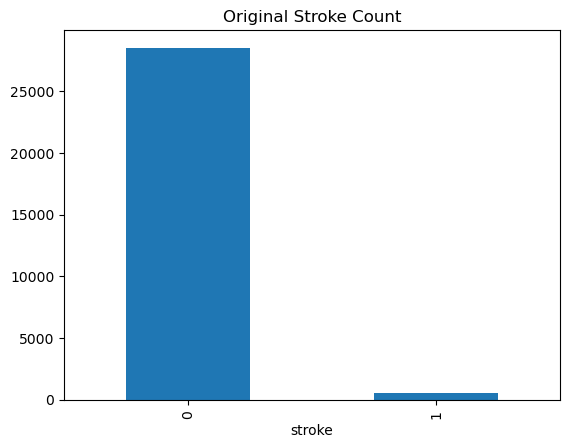

In [35]:
ds.stroke.value_counts().plot(kind='bar', title='Original Stroke Count');

Bộ dữ liệu bị Imbalanced nặng, giá trị mà người bệnh bị đột quỵ chỉ chiếm gần 1.8% toàn bệnh nhân

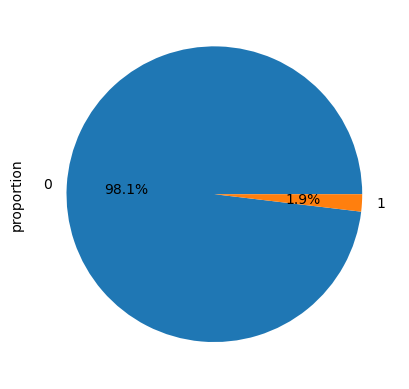

In [36]:
ds.stroke.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

## Hàm Modul

### SVM

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_svm(X_train, y_train, X_test, y_test, random_state=42):
    svm = SVC(random_state=random_state)
    svm.fit(X_train, y_train)
    y_pred_svmc = svm.predict(X_test)
    svm_acc = accuracy_score(y_test, y_pred_svmc)
    svm_recall = recall_score(y_test, y_pred_svmc, pos_label=1)
    print(f"Accuracy: {svm_acc:.4f}")
    print(f"Recall: {svm_recall:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_svmc))
    
    return svm 


### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_logistic_regression(X_train, y_train, X_test, y_test, random_state=42):
    logistic_regression = LogisticRegression(random_state=random_state)
    logistic_regression.fit(X_train, y_train)
    y_pred_lr = logistic_regression.predict(X_test)
    lr_acc = accuracy_score(y_test, y_pred_lr)
    lr_recall = recall_score(y_test, y_pred_lr, pos_label=1)
    print(f"Accuracy: {lr_acc:.4f}")
    print(f"Recall: {lr_recall:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_lr))
    return logistic_regression

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_random_forest(X_train, y_train, X_test, y_test, random_state=42):
    rf = RandomForestClassifier(random_state=random_state)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    rf_acc = accuracy_score(y_test, y_pred_rf)
    rf_recall = recall_score(y_test, y_pred_rf, pos_label=1)
    print(f"Accuracy: {rf_acc:.4f}")
    print(f"Recall: {rf_recall:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_rf))
    return rf

## Random under-sampling

In [40]:
count_class_0, count_class_1 = train_data.stroke.value_counts()

ds_class_0 = train_data[train_data['stroke'] == 0]
ds_class_1 = train_data[train_data['stroke'] == 1]

Random under-sampling:
stroke
0    411
1    411
Name: count, dtype: int64


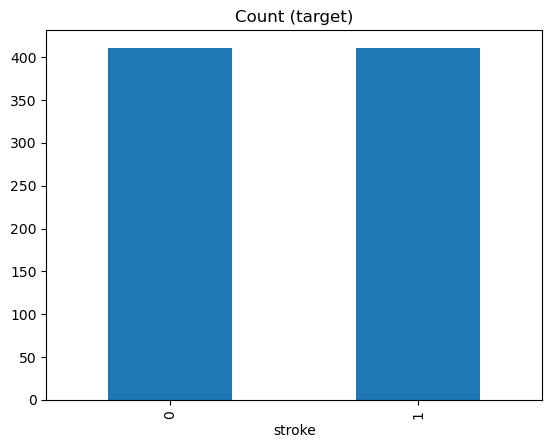

In [41]:
ds_class_0_under = ds_class_0.sample(count_class_1)
train_under = pd.concat([ds_class_0_under, ds_class_1], axis=0)

print('Random under-sampling:')
print(train_under.stroke.value_counts())

train_under.stroke.value_counts().plot(kind='bar', title='Count (target)');

In [42]:
train_under

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
6870,0,0.513889,0,0,1,0,0.065158,0.166056,0,0,1,0,0,0
40246,0,0.708333,0,0,1,0,0.537705,0.202686,0,0,0,1,1,0
39307,1,0.402778,0,0,0,1,0.060625,0.189255,0,0,1,0,1,0
36400,1,0.652778,1,1,1,1,0.571810,0.266178,0,0,0,0,0,1
30230,0,0.694444,0,0,1,0,0.089815,0.199023,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20354,0,0.958333,0,0,1,0,0.046772,0.157509,1,0,0,1,1,0
15129,0,0.902778,0,0,1,1,0.047873,0.137973,1,0,1,0,0,0
19680,0,0.819444,0,0,1,1,0.341806,0.131868,1,0,0,1,1,0
37031,1,0.833333,0,1,1,0,0.730258,0.197802,1,0,1,0,0,1


In [43]:
X_train = train_under.drop('stroke', axis=1)
y_train = train_under['stroke']
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

### Feature Importance

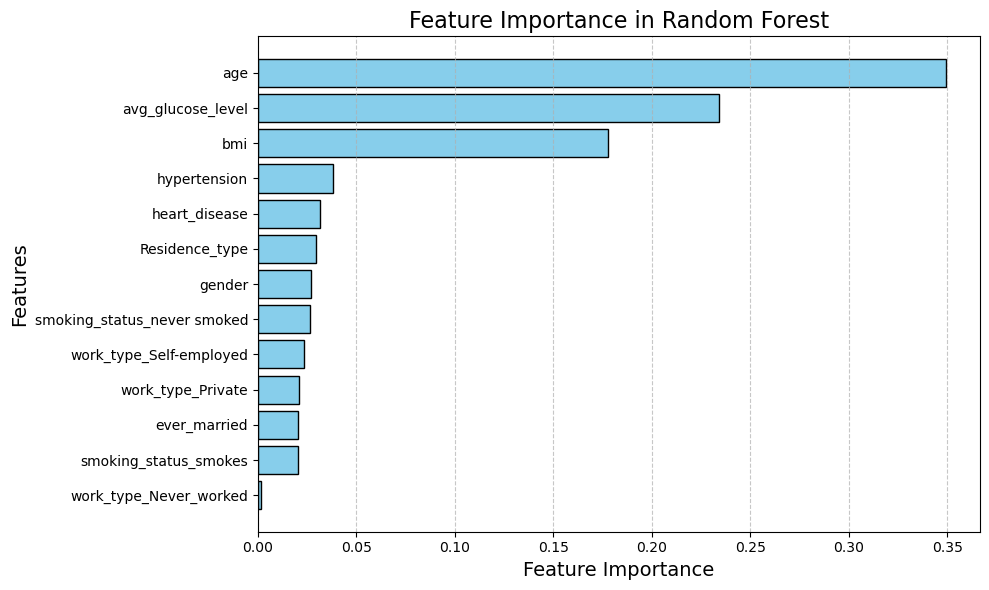

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = X_train
y = y_train
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_

features = X.columns

sorted_idx = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
features_sorted = [features[i] for i in sorted_idx]
importance_sorted = [importance[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_sorted, color="skyblue", edgecolor="black")
plt.title("Feature Importance in Random Forest", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### SVM

All Feature

In [45]:
train_svm(X_train,y_train,X_test,y_test)

Accuracy: 0.6799
Recall: 0.8832

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.88      0.09       137

    accuracy                           0.68      7267
   macro avg       0.52      0.78      0.45      7267
weighted avg       0.98      0.68      0.79      7267



SVC(random_state=42)

1 Feature

In [46]:
X_train1 = train_under[['age']] 
X_test1 = test_data[['age']] 
y_train1 = train_under['stroke']
y_test1 = test_data['stroke']
train_svm(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.6856
Recall: 0.8613

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.86      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.77      0.45      7267
weighted avg       0.98      0.69      0.80      7267



SVC(random_state=42)

In [47]:
import joblib
model=train_svm(X_train1,y_train1,X_test1,y_test1)
joblib.dump(model, 'app_model.pkl')

Accuracy: 0.6856
Recall: 0.8613

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.86      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.77      0.45      7267
weighted avg       0.98      0.69      0.80      7267



['app_model.pkl']

In [1]:
import joblib
loaded_model = joblib.load('app_model.pkl')


In [1]:
import pandas as pd
new_data = pd.DataFrame({'age': [0.66]})
prediction = loaded_model.predict(new_data)
print("Dự đoán:", prediction)

NameError: name 'loaded_model' is not defined

3 Feature

In [52]:
X_train3 = train_under[['age', 'avg_glucose_level', 'bmi']] 
X_test3 = test_data[['age', 'avg_glucose_level', 'bmi']] 
y_train3 = train_under['stroke']
y_test3 = test_data['stroke']
train_svm(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.6807
Recall: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.85      0.09       137

    accuracy                           0.68      7267
   macro avg       0.52      0.76      0.45      7267
weighted avg       0.98      0.68      0.79      7267



SVC(random_state=42)

5 Feature

In [53]:
X_train5 = train_under[['age','avg_glucose_level','bmi','hypertension','heart_disease'] ]
X_test5 = test_data[['age','avg_glucose_level','bmi','hypertension','heart_disease'] ]
y_train5 = train_under['stroke']
y_test5 = test_data['stroke']
train_svm(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.6878
Recall: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.85      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.77      0.45      7267
weighted avg       0.98      0.69      0.80      7267



SVC(random_state=42)

7 Feature

In [54]:
X_train7 = train_under[['age','avg_glucose_level','bmi','hypertension','heart_disease','Residence_type','gender' ]]
X_test7 = test_data[['age','avg_glucose_level','bmi','hypertension','heart_disease','Residence_type','gender' ]]
y_train7 = train_under['stroke']
y_test7 = test_data['stroke']
train_svm(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.6818
Recall: 0.8759

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      7130
           1       0.05      0.88      0.09       137

    accuracy                           0.68      7267
   macro avg       0.52      0.78      0.45      7267
weighted avg       0.98      0.68      0.79      7267



SVC(random_state=42)

### Logistic Regression

Full Feature

In [55]:
train_logistic_regression(X_train,y_train,X_test,y_test)

Accuracy: 0.7207
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83      7130
           1       0.05      0.83      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.78      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

1 Feature

In [56]:
train_logistic_regression(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.7004
Recall: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      7130
           1       0.05      0.85      0.10       137

    accuracy                           0.70      7267
   macro avg       0.52      0.77      0.46      7267
weighted avg       0.98      0.70      0.81      7267



LogisticRegression(random_state=42)

3 Feature

In [57]:
train_logistic_regression(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.7095
Recall: 0.8394

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      7130
           1       0.05      0.84      0.10       137

    accuracy                           0.71      7267
   macro avg       0.52      0.77      0.46      7267
weighted avg       0.98      0.71      0.81      7267



LogisticRegression(random_state=42)

5 Feature

In [58]:
train_logistic_regression(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.7208
Recall: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83      7130
           1       0.06      0.85      0.10       137

    accuracy                           0.72      7267
   macro avg       0.53      0.79      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

7 Feature

In [59]:
train_logistic_regression(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.7196
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.83      7130
           1       0.05      0.83      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.77      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

### Random Forest

All Feature

In [60]:
train_random_forest(X_train,y_train,X_test,y_test)

Accuracy: 0.6978
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      7130
           1       0.05      0.83      0.09       137

    accuracy                           0.70      7267
   macro avg       0.52      0.76      0.46      7267
weighted avg       0.98      0.70      0.81      7267



RandomForestClassifier(random_state=42)

1 Feature

In [61]:
train_random_forest(X_train1,y_train1,X_test1,y_test1)

Accuracy: 0.7002
Recall: 0.8540

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      7130
           1       0.05      0.85      0.10       137

    accuracy                           0.70      7267
   macro avg       0.52      0.78      0.46      7267
weighted avg       0.98      0.70      0.81      7267



RandomForestClassifier(random_state=42)

3 Feature

In [62]:
train_random_forest(X_train3,y_train3,X_test3,y_test3)

Accuracy: 0.6869
Recall: 0.7518

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7130
           1       0.04      0.75      0.08       137

    accuracy                           0.69      7267
   macro avg       0.52      0.72      0.45      7267
weighted avg       0.98      0.69      0.80      7267



RandomForestClassifier(random_state=42)

5 Feature

In [63]:
train_random_forest(X_train5,y_train5,X_test5,y_test5)

Accuracy: 0.6913
Recall: 0.7372

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7130
           1       0.04      0.74      0.08       137

    accuracy                           0.69      7267
   macro avg       0.52      0.71      0.45      7267
weighted avg       0.97      0.69      0.80      7267



RandomForestClassifier(random_state=42)

7 Feature

In [64]:
train_random_forest(X_train7,y_train7,X_test7,y_test7)

Accuracy: 0.6927
Recall: 0.8248

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      7130
           1       0.05      0.82      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.76      0.45      7267
weighted avg       0.98      0.69      0.80      7267



RandomForestClassifier(random_state=42)

## Random Over-sampling

### SMOTE Over-Sampling

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
X_smote = train_data.drop(columns=['stroke'])
y_smote = train_data['stroke']

stroke
0    21387
1    21387
Name: count, dtype: int64


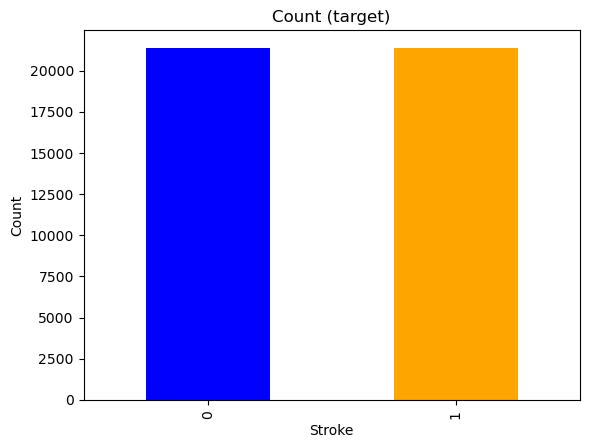

In [67]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

print(y_sm.value_counts())

y_sm.value_counts().plot(kind='bar', title='Count (target)', color=['blue', 'orange'])
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()


In [68]:
X_trainsm = X_sm
y_trainsm = y_sm
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

### Feature Importance

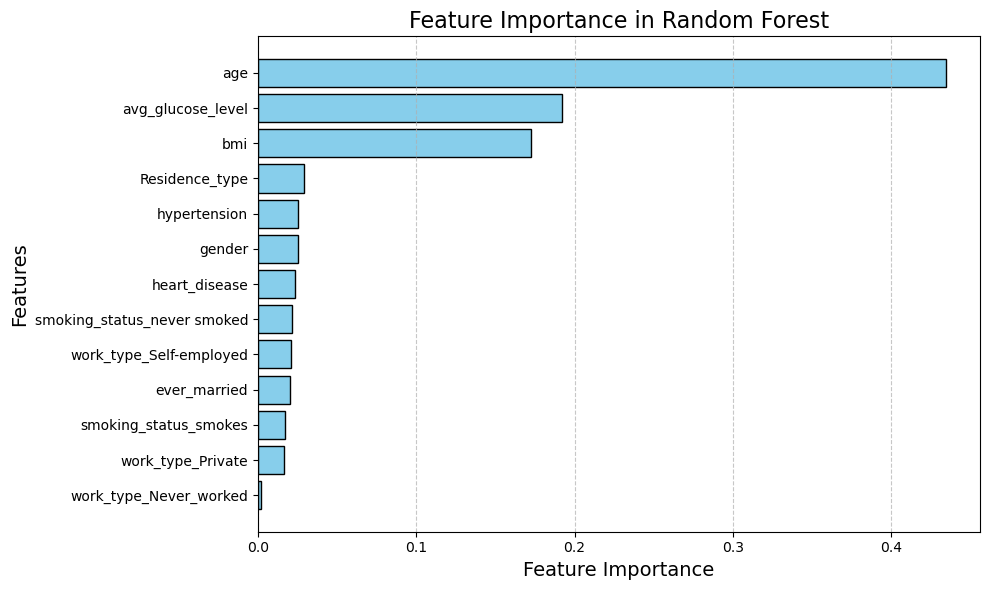

In [69]:
from sklearn.ensemble import RandomForestClassifier

X = X_trainsm
y = y_trainsm
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_

features = X.columns

sorted_idx = sorted(range(len(importance)), key=lambda k: importance[k], reverse=True)
features_sorted = [features[i] for i in sorted_idx]
importance_sorted = [importance[i] for i in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(features_sorted, importance_sorted, color="skyblue", edgecolor="black")
plt.title("Feature Importance in Random Forest", fontsize=16)
plt.xlabel("Feature Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### SVM

All Feature

In [70]:
train_svm(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.7401
Recall: 0.7518

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      7130
           1       0.05      0.75      0.10       137

    accuracy                           0.74      7267
   macro avg       0.52      0.75      0.47      7267
weighted avg       0.98      0.74      0.83      7267



SVC(random_state=42)

1 Feature

In [71]:
X_train1sm = X_trainsm[['age']] 
X_test1sm = test_data[['age']] 
y_train1sm = y_trainsm
y_test1sm = test_data['stroke']
train_svm(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.6662
Recall: 0.8686

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      7130
           1       0.05      0.87      0.09       137

    accuracy                           0.67      7267
   macro avg       0.52      0.77      0.44      7267
weighted avg       0.98      0.67      0.78      7267



SVC(random_state=42)

3 Feature

In [72]:
X_train3sm = X_trainsm[['age','avg_glucose_level','bmi']] 
X_test3sm = test_data[['age','avg_glucose_level','bmi']] 
y_train3sm = y_trainsm
y_test3sm = test_data['stroke']
train_svm(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.6897
Recall: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.81      7130
           1       0.05      0.85      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.77      0.45      7267
weighted avg       0.98      0.69      0.80      7267



SVC(random_state=42)

5 Feature

In [74]:
X_train5sm = X_trainsm[['age','avg_glucose_level','bmi','Residence_type','gender']]
X_test5sm = test_data[['age','avg_glucose_level','bmi','Residence_type','gender']]
y_train5sm = y_trainsm
y_test5sm = test_data['stroke']
train_svm(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.6710
Recall: 0.8613

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      7130
           1       0.05      0.86      0.09       137

    accuracy                           0.67      7267
   macro avg       0.52      0.76      0.44      7267
weighted avg       0.98      0.67      0.79      7267



SVC(random_state=42)

7 Feature

In [76]:
X_train7sm = X_trainsm[['age','avg_glucose_level','bmi','Residence_type','gender','heart_disease','hypertension'] ]
X_test7sm = test_data[['age','avg_glucose_level','bmi','Residence_type','gender','heart_disease','hypertension'] ]
y_train7sm = y_trainsm
y_test7sm = test_data['stroke']
train_svm(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.6923
Recall: 0.7956

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7130
           1       0.05      0.80      0.09       137

    accuracy                           0.69      7267
   macro avg       0.52      0.74      0.45      7267
weighted avg       0.98      0.69      0.80      7267



SVC(random_state=42)

### Random Forest

All Feature

In [75]:
train_random_forest(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.9161
Recall: 0.2044

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7130
           1       0.05      0.20      0.08       137

    accuracy                           0.92      7267
   macro avg       0.52      0.57      0.52      7267
weighted avg       0.97      0.92      0.94      7267



RandomForestClassifier(random_state=42)

1 Feature

In [77]:
train_random_forest(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.9811
Recall: 0.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7130
           1       0.00      0.00      0.00       137

    accuracy                           0.98      7267
   macro avg       0.49      0.50      0.50      7267
weighted avg       0.96      0.98      0.97      7267



c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


RandomForestClassifier(random_state=42)

3 Feature

In [78]:
train_random_forest(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.8902
Recall: 0.2409

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7130
           1       0.05      0.24      0.08       137

    accuracy                           0.89      7267
   macro avg       0.51      0.57      0.51      7267
weighted avg       0.97      0.89      0.93      7267



RandomForestClassifier(random_state=42)

5 Feature

In [79]:
train_random_forest(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.9059
Recall: 0.2263

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7130
           1       0.05      0.23      0.08       137

    accuracy                           0.91      7267
   macro avg       0.52      0.57      0.52      7267
weighted avg       0.97      0.91      0.93      7267



RandomForestClassifier(random_state=42)

7 Feature

In [80]:
train_random_forest(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.8927
Recall: 0.2263

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      7130
           1       0.04      0.23      0.07       137

    accuracy                           0.89      7267
   macro avg       0.51      0.57      0.51      7267
weighted avg       0.97      0.89      0.93      7267



RandomForestClassifier(random_state=42)

### Logistic Regression

All Feature

In [81]:
train_logistic_regression(X_trainsm,y_trainsm,X_test,y_test)

Accuracy: 0.7242
Recall: 0.8467

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      7130
           1       0.06      0.85      0.10       137

    accuracy                           0.72      7267
   macro avg       0.53      0.78      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

1 Feature

In [82]:
train_logistic_regression(X_train1sm,y_train1sm,X_test1sm,y_test1sm)

Accuracy: 0.7150
Recall: 0.8248

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      7130
           1       0.05      0.82      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.77      0.46      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

3 Feature

In [83]:
train_logistic_regression(X_train3sm,y_train3sm,X_test3sm,y_test3sm)

Accuracy: 0.7161
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      7130
           1       0.05      0.83      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.77      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

5 Feature

In [84]:
train_logistic_regression(X_train5sm,y_train5sm,X_test5sm,y_test5sm)

Accuracy: 0.7167
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83      7130
           1       0.05      0.83      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.77      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)

7 Feature

In [85]:
train_logistic_regression(X_train7sm,y_train7sm,X_test7sm,y_test7sm)

Accuracy: 0.7213
Recall: 0.8321

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.72      0.84      7130
           1       0.05      0.83      0.10       137

    accuracy                           0.72      7267
   macro avg       0.52      0.78      0.47      7267
weighted avg       0.98      0.72      0.82      7267



LogisticRegression(random_state=42)